<a href="https://colab.research.google.com/github/FoleyLab/gmgauge/blob/main/Goeppert_Mayer_Gauge_Episode_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install WPTherml to get a few of it's built-in features

In [ ]:
!pip install wptherml

from wptherml.wpml import multilayer
from wptherml.numlib import numlib
from matplotlib import pyplot as plt
import numpy as np



We don't really care about the structure, we just want thermal emission in the THz regime (0.3 - 30 THz), which, in wavelengths, 
is about 10 microns to 1 mm.  We will first use Wien's displacement law to figure out the temperature where the Blackbody spectrum peaks in the middle of the THz regime.  
Wien's displacement law is as follows:

\begin{equation}
\lambda_{peak} = \frac{b}{T}
\end{equation}
where $b = 2898 \: \mu m \cdot K$.  We can re-arrange for the Temperature assuming we want $\lambda_{peak} = 300 \: \mu m$, just to be really arbitrary!

In [ ]:
### let's use Wiens displacement law to figure out the temperature
### where the wavelength peaks in the middle of the THz

# this is Wiens displacement constant in microns * K
b  = 2898. 
# This is Planck's constant in SI units, which we will use later!
h = 6.626e-34
# This is the Speed of light in SI units, which we will use later!
c = 2.99e8
# We can call 3e-4 m (300 microns) the middle of THz?
lambda_middle = 300
# Compute the temperature from Wien's law
T_middle = b / lambda_middle
print("The temperature at which the Blackbody spectrum peaks at 300 microns is",T_middle, "K")


The temperature at which the Blackbody spectrum peaks at 300 microns is 9.66 K


Now we will just create an object that includes the blackbody spectrum across the THz spectrum at the temperature we just
computed (stored in the variable `T_middle`)

  Thickness array not specified!
  Proceeding with default structure - optically thick W! 
  Material array not specified!
  Proceeding with default structure - optically thick W! 


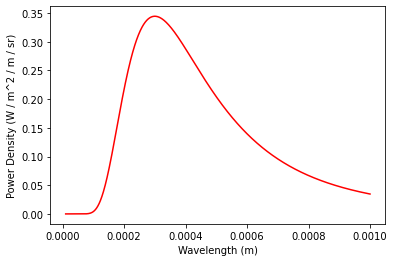

In [ ]:
### dictionary that stores basic properties 
### of the multilayer structure you want to simulate
structure = {

        'Lambda_List': [10e-6, 1e-3, 1000],
        'Temperature': T_middle
}

### create the Thz object
thz = multilayer(structure)

### Compute the blackbody spectrum at this temperature across the THz range and plot it!
thz.thermal_emission()
plt.plot(thz.lambda_array, thz.BBs, 'red')
plt.ylabel("Power Density (W / m^2 / m / sr)")
plt.xlabel("Wavelength (m)")
plt.show()



Let's take the Blackbody spectrum (which has dimensions of a power per wavelength per unit solid angle per unit area of the emitting surface), and convert it into a photon flux density (which has dimensions of photon number per wavelength per unit solid angle per unit area of the emitting surface).  While we are at it, we can implicitly take care of the emission into a hemisphere (integral over all solid angles, see Equations 14-16 in [this document](https://github.com/FoleyLab/wptherml/blob/master/docs/Equations.pdf) for more details).  In summary, this conversion from power density to photon flux density is as follows:
\begin{equation}
\dot{N}(\lambda, T) = \pi \frac{\lambda}{h c} \rho(\lambda, T)
\end{equation},
where $\lambda$ is the wavelength, $h$ is Planck's constant, $c$ is the speed of light, and the factor of $\pi$ arises from the integration over solid angles in the hemisphere.  We already defined these constants in an earlier cell, so we can get this photon flux density with a single line.  

In [ ]:

N_dot = np.pi * thz.BBs * thz.lambda_array/(h*c)


To get the total number of photons emitted across the THz per unit area of the emitting surface, we will just need to integrate over the range of wavelengths in the THz:
\begin{equation}
N_{photons}(T) = \int_{10 \mu m}^{1 mm} \dot{N}(\lambda, T) d\lambda.
\end{equation}
We can perform this integral using the `Integrate` function in WPTherml's `numlib` library, and the result will be in SI units (so photons / square meters).  From there, we can figure out how many square meters of emitting surface are required to get Avagadro's number of THz photon emitter per second simply as
\begin{equation}
A = \frac{N_A}{N_{photons}(T)} .
\end{equation}

In [ ]:
N_photons = numlib.Integrate(p_fl, thz.lambda_array,10e-6,  1e-3)
Na = 6.022e23
area = Na/N_photons
print("Area of the emitting surface required to emit 1 mole of THz photons per second is ",area, "m^2")


Area of the emitting surface required to emit 1 mole of THz photons per second is  1895582.1677699138 m^2


# Question 1:  If THz spectroscopy were a Stereolab song, which song would it be?
a. Tone Burst (Transient Random-Noise Bursts with Announcements) 

b. Caledoscopic Gaze (Cobra and Phases)

c. Refractions in the plastic pulse (Dots and Loops)

d. Whisper Pitch (Single, appears on Fab Four Suture)

# Question 2: At what temperature does the blackbody spectrum peak in the middle of the Thz regime

a. 0.1 K

b. 1 K

c. 10 K

d. 100 K

# Question 3: How large does an emitting surface need to be to emit 1 mole of THz photons per second at 10 K?

a. 1e0 sq meters

b. 1e3 sq meters

c. 1e6 sq meters

d. 1e9 sq meters


